In [141]:
!pip install tensorflow

Importing libraries

In [142]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error

from IPython.core.display import display, HTML

from datetime import datetime

Loading data

In [143]:
df = pd.read_csv("TSLA.csv")

In [144]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-01,13.934667,14.544000,13.905333,14.464667,14.464667,110571000
1,2014-04-02,14.666667,15.392667,14.536667,15.352667,15.352667,161734500
2,2014-04-03,15.353333,15.715333,14.800000,15.026667,15.026667,163855500
3,2014-04-04,15.067333,15.218000,14.083333,14.148667,14.148667,170184000
4,2014-04-07,13.720667,14.413333,13.567333,13.834667,13.834667,147832500
...,...,...,...,...,...,...,...
2511,2024-03-22,166.690002,171.199997,166.300003,170.830002,170.830002,75454700
2512,2024-03-25,168.759995,175.240005,168.729996,172.630005,172.630005,74228600
2513,2024-03-26,178.580002,184.250000,177.380005,177.669998,177.669998,113186200
2514,2024-03-27,181.410004,181.910004,176.000000,179.830002,179.830002,81804000


Data Pre-processing

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


In [153]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-01,13.934667,14.544000,13.905333,14.464667,14.464667,110571000
1,2014-04-02,14.666667,15.392667,14.536667,15.352667,15.352667,161734500
2,2014-04-03,15.353333,15.715333,14.800000,15.026667,15.026667,163855500
3,2014-04-04,15.067333,15.218000,14.083333,14.148667,14.148667,170184000
4,2014-04-07,13.720667,14.413333,13.567333,13.834667,13.834667,147832500


In [155]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2511,2024-03-22,166.690002,171.199997,166.300003,170.830002,170.830002,75454700
2512,2024-03-25,168.759995,175.240005,168.729996,172.630005,172.630005,74228600
2513,2024-03-26,178.580002,184.250000,177.380005,177.669998,177.669998,113186200
2514,2024-03-27,181.410004,181.910004,176.000000,179.830002,179.830002,81804000
2515,2024-03-28,177.449997,179.570007,175.300003,175.789993,175.789993,77654800


In [157]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,98.519054,100.666671,96.200207,98.484582,98.484582,1.122503e+08
std,108.981735,111.393039,106.309077,108.878413,108.878413,7.432329e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,16.164500,16.429832,15.892333,16.169835,16.169835,6.647145e+07
50%,22.571001,22.965333,22.167001,22.524999,22.524999,9.295260e+07
75%,203.535004,208.110001,198.505001,203.340836,203.340836,1.305301e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [159]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [161]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [163]:
df.shape

(2516, 7)

Stock's progression with time

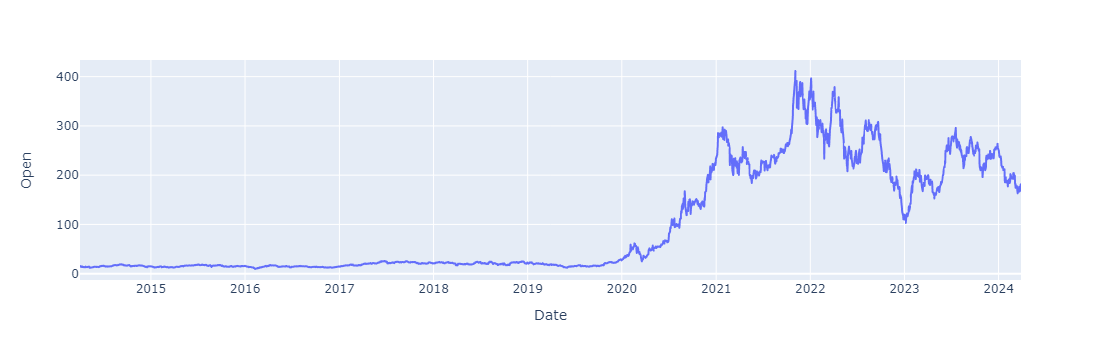

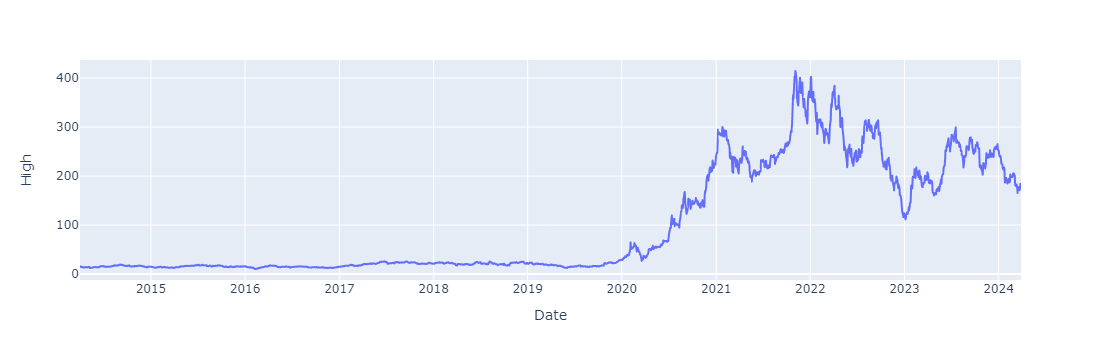

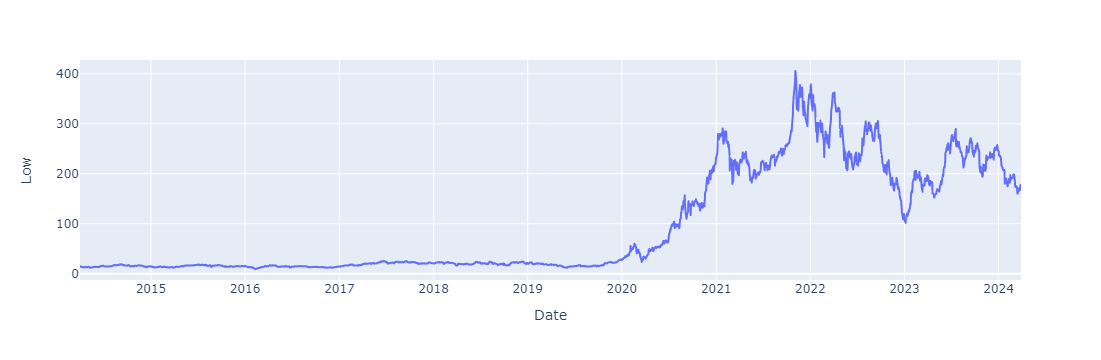

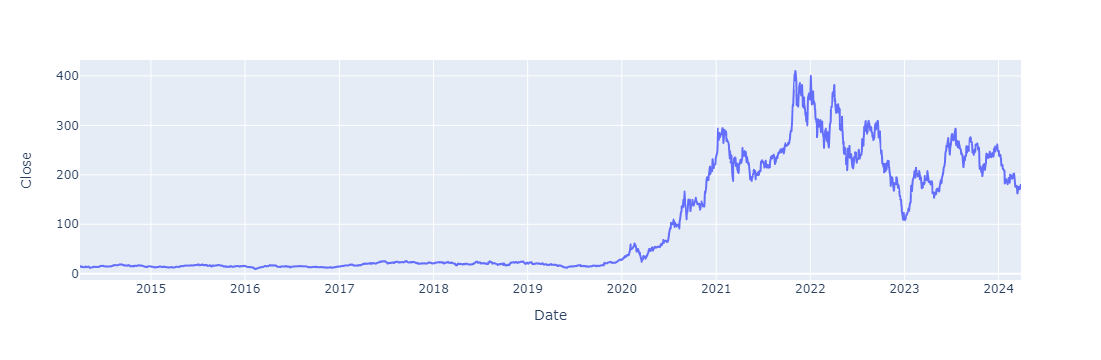

In [165]:
for i in df.columns[1:5]:
    fig = px.line(df, y=i, x=df.columns[0])
    fig.show()

Converting Dates

In [169]:
def convert_date(x):
    date = datetime.strptime(x, "%Y-%m-%d")
    return [date.month, date.year]



months = ["January", "February", "March", "April",
         "May", "June", "July", "August",
         "September", "October", "November", "December"]

In [171]:
df["Year"] = df["Date"].apply(lambda x: convert_date(x)[1])
df["Month"] = df["Date"].apply(lambda x: convert_date(x)[0])

In [173]:
nums = df.columns[1:-4]

Average monthly stock prices for a year over a 2014-2024 year period

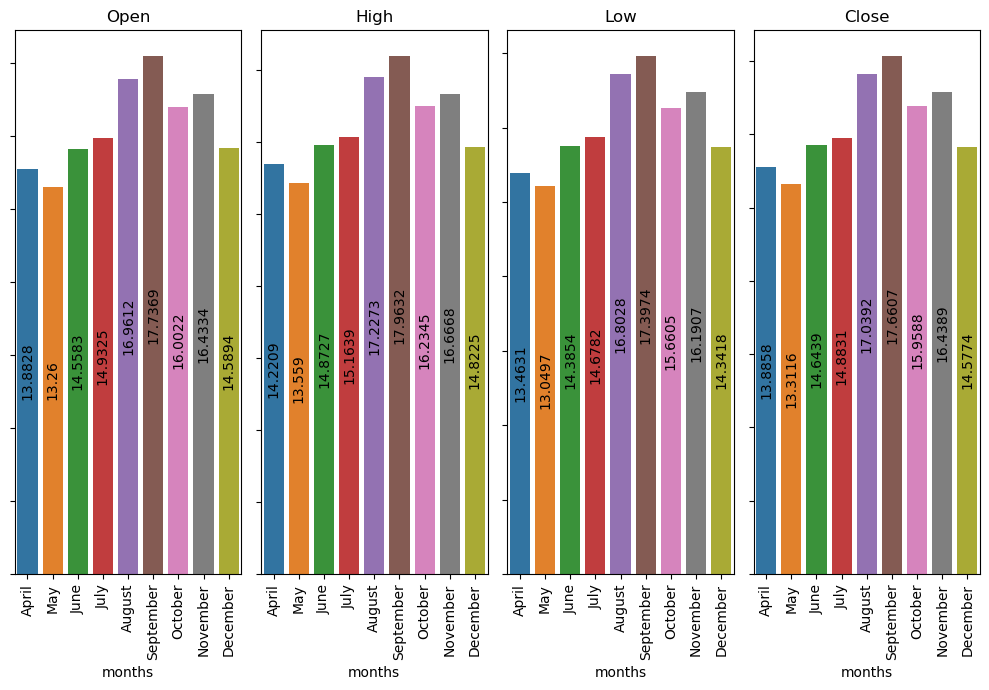

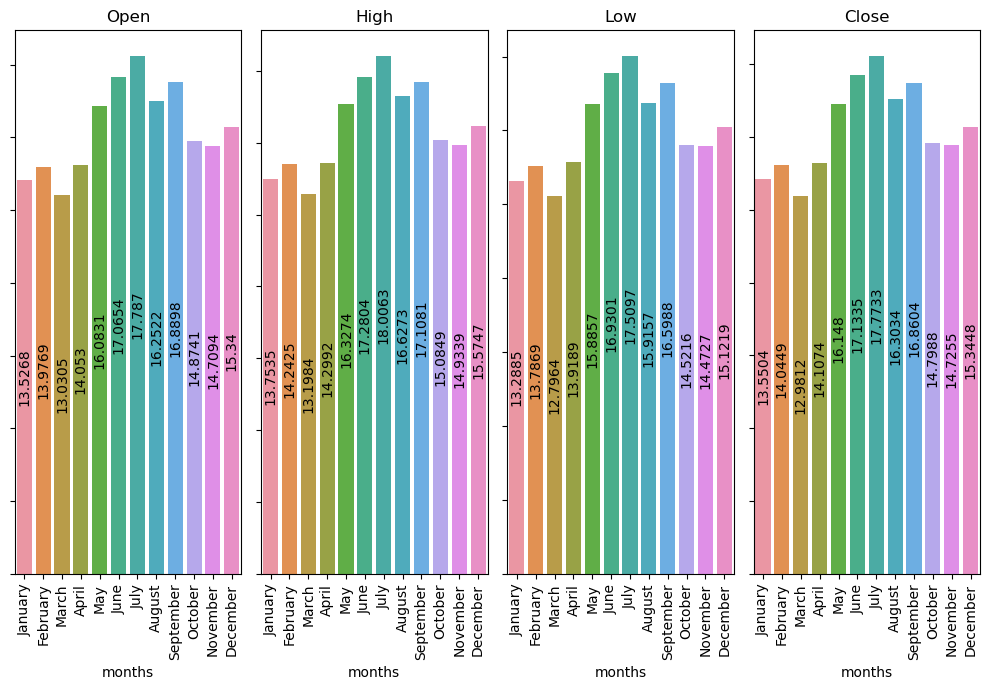

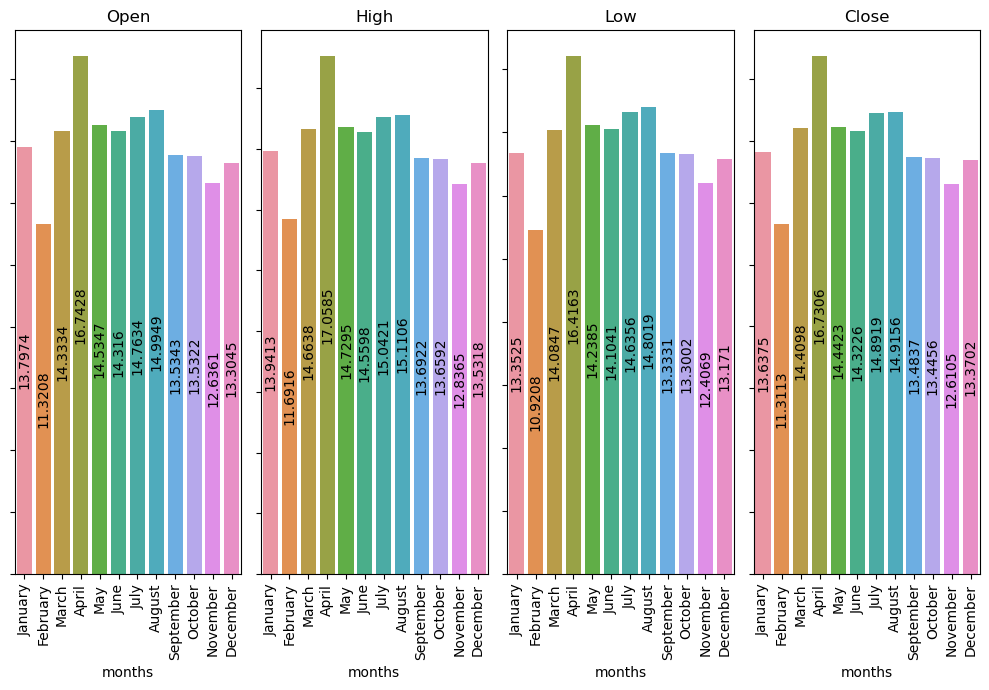

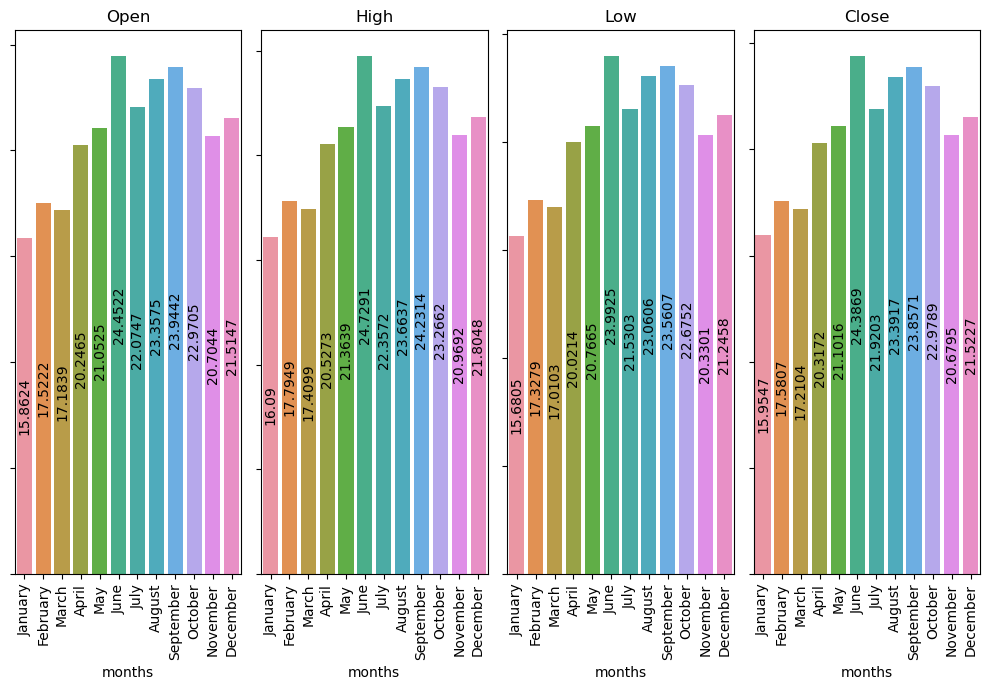

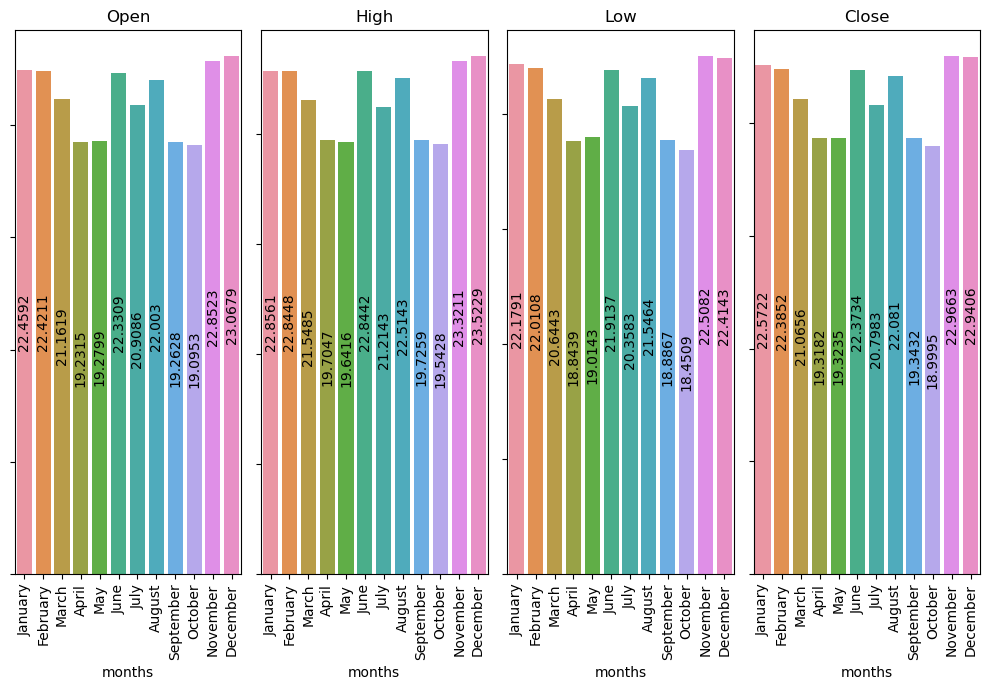

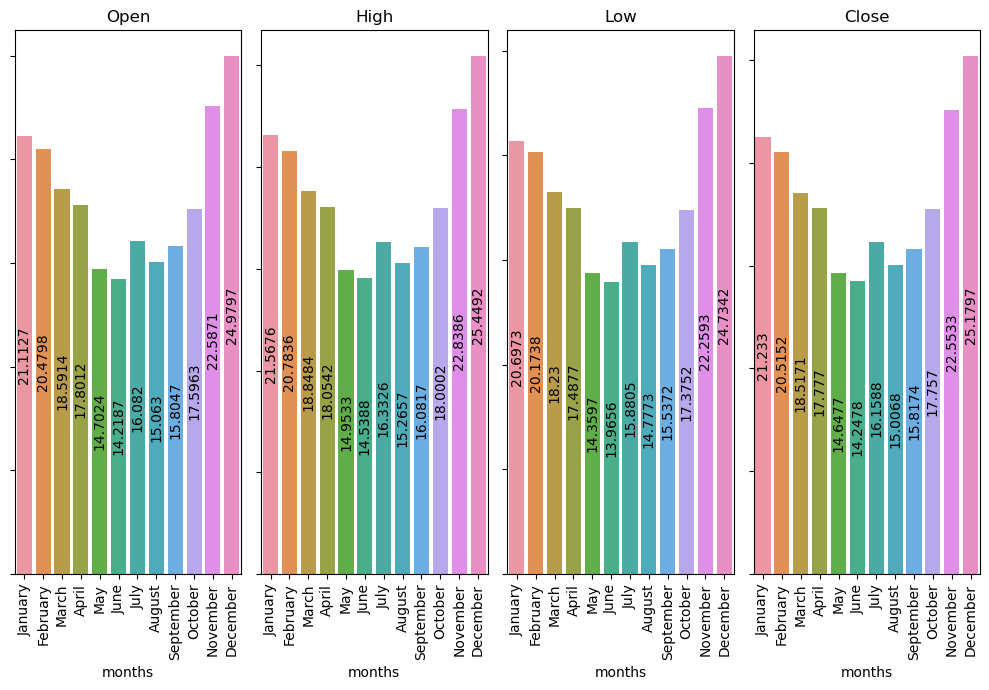

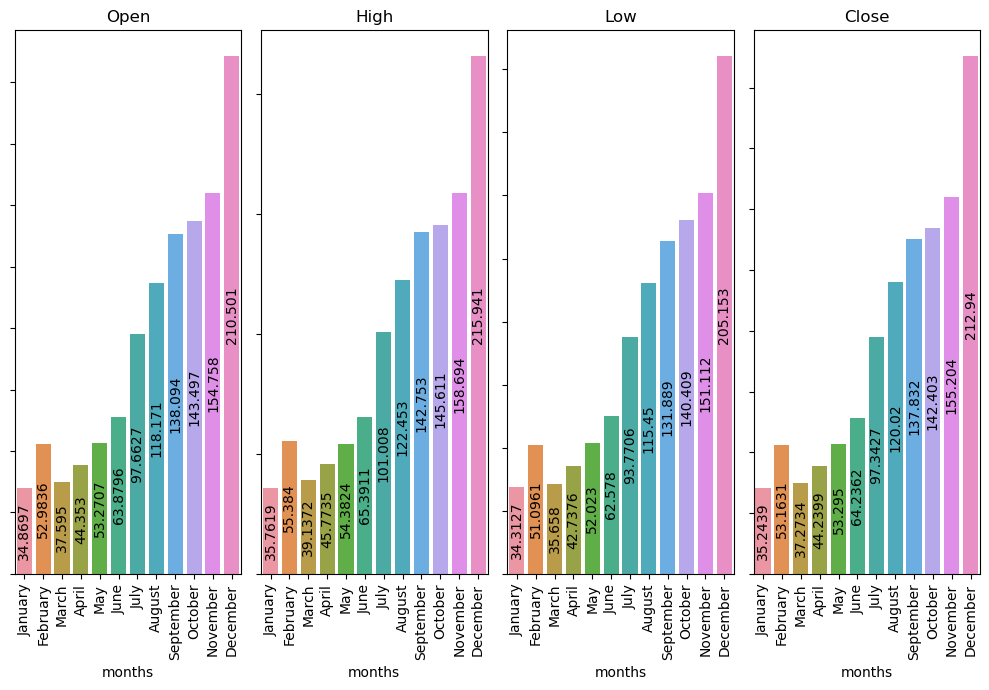

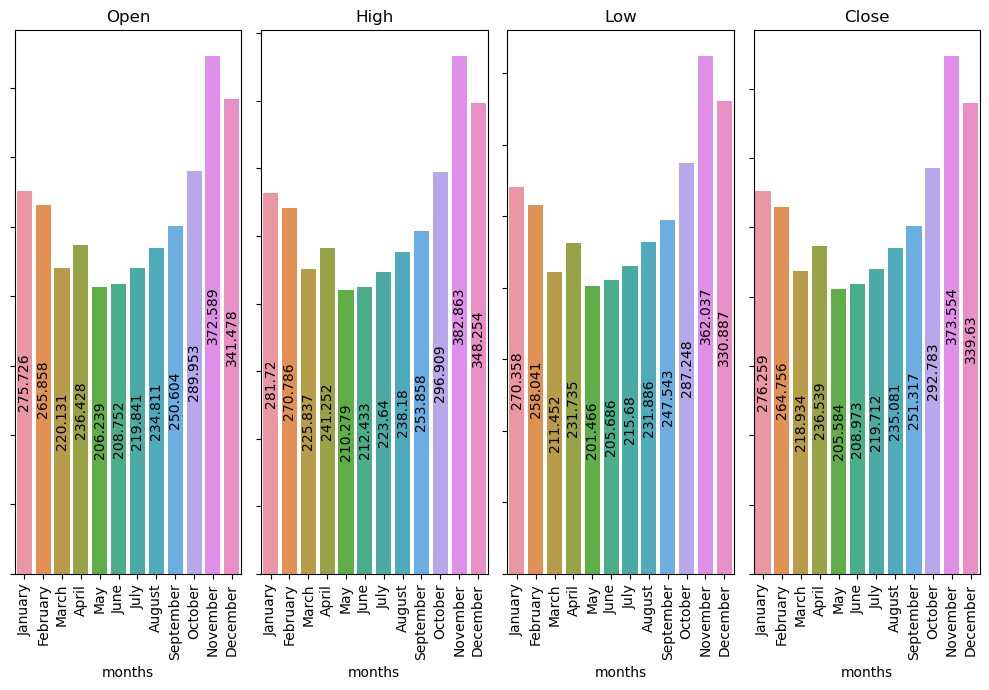

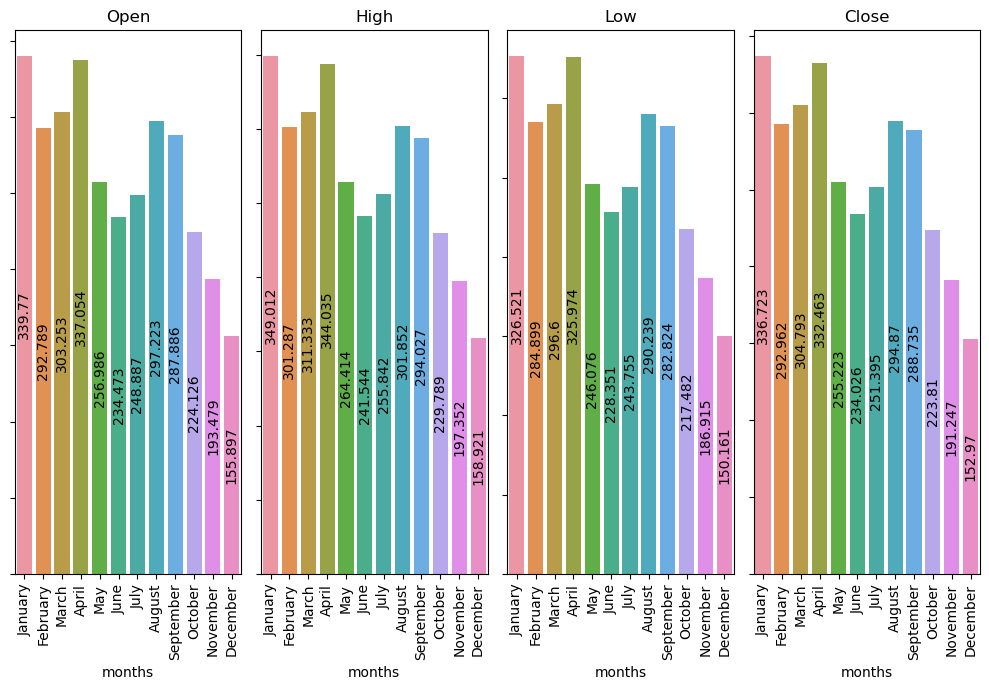

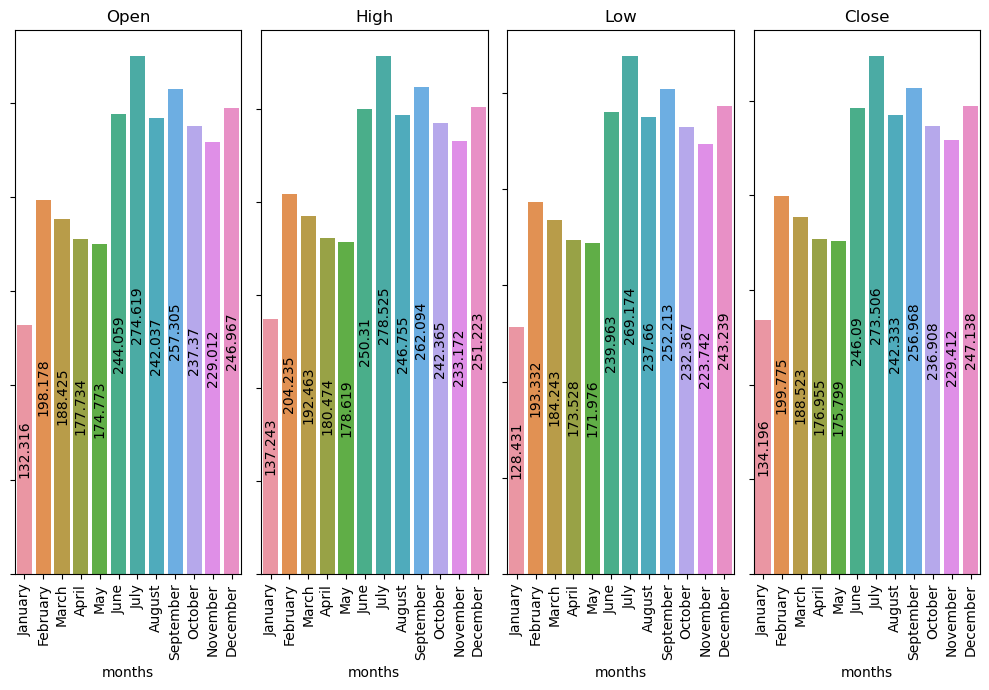

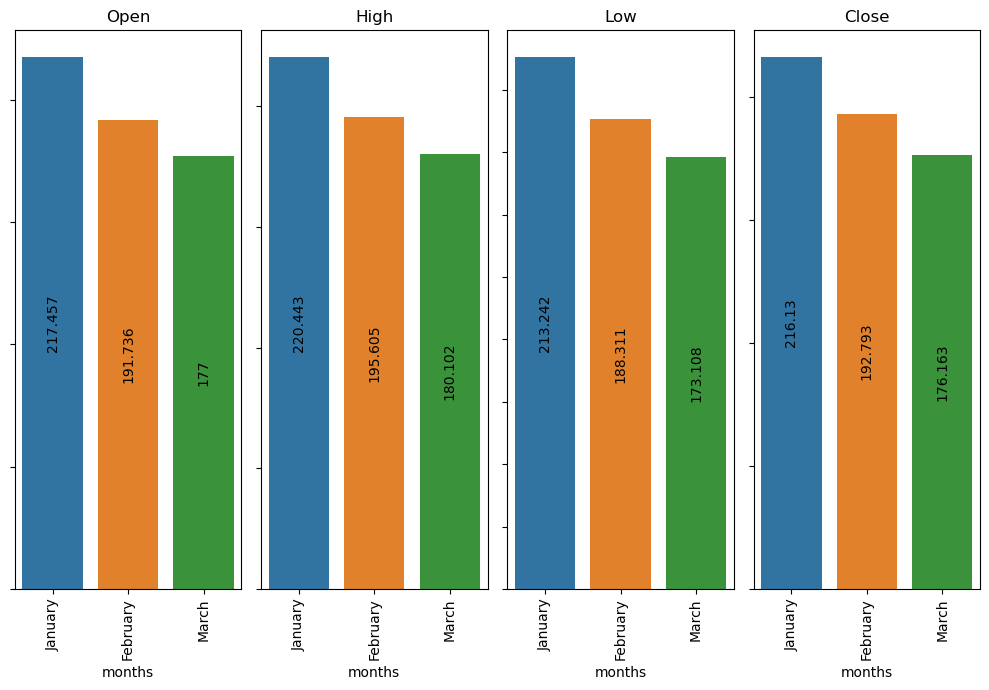

In [175]:
years = df["Year"].unique()

for i in sorted(years):
    display(HTML("<h2>Monthly average stock prices for {}</h2>".format(i)))
    temp_df = df[df["Year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
    grouped = temp_df.groupby("Month")
    for k, j in enumerate(nums):
        mean = pd.DataFrame(grouped[j].mean())
        mean = mean.sort_index(ascending=True)
        dd = {"month": [], j: []}
        for l in range(mean.shape[0]):
            dd["month"] += [months[mean.index[l]-1]]
            dd[j] += [mean.iloc[l, 0]]
        dd = pd.DataFrame(dd)
        
        sns.barplot(x=dd.iloc[:, 0].values, y=dd.iloc[:, 1].values, ax=axes[k])
        for container in axes[k].containers:
            axes[k].bar_label(container, label_type="center", rotation=90)
        axes[k].set_xticklabels(axes[k].get_xticklabels(), rotation=90)
        axes[k].set_title(j)
        axes[k].set_ylabel("")
        axes[k].set_xlabel("months")
        axes[k].set_yticklabels(())
        
    plt.tight_layout()
    plt.show()

In [176]:
data = df[nums].copy()

Preparing Data 

In [97]:
cols = data.columns

for i in cols:
    dname = "Target "+i
    data[dname] = data[i].shift(-1)

In [99]:
data.dropna(inplace=True)

Scaling Data

In [104]:
sc = MinMaxScaler()
scaled = sc.fit_transform(data.values)

Data Training

In [106]:
x = []

backcandles = 1
for j in range(4):
    x.append([])
    for i in range(backcandles, scaled.shape[0]):
        x[j].append(scaled[i-backcandles:i, j])

x = np.moveaxis(x, [0], [2])

x, yi = np.array(x), np.array(scaled[backcandles:, -4:])
y = np.reshape(yi, (len(yi), 4))

Spit Data

In [108]:
split = int(len(x)*0.8)

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

ANN Model Architecture

In [110]:
lstm_input = tf.keras.layers.Input(shape=(backcandles, 4), name="lstm_input")
inputs = tf.keras.layers.LSTM(150, name="first_layer")(lstm_input)
inputs = tf.keras.layers.Dense(4, name="dense_layer", activation="linear")(inputs)
model = tf.keras.models.Model(inputs=lstm_input, outputs=inputs)
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss="mse")
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_input (InputLayer)              │ (None, 1, 4)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_layer (LSTM)                   │ (None, 150)                 │          93,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer (Dense)                  │ (None, 4)                   │             604 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,604 (365.64 KB)

 Trainable params: 93,604 (365.64 KB)

 Non-trainable params: 0 (0.00 B)

ANN Training Model

In [112]:
history = model.fit(x=x_train, y=y_train, batch_size=16, epochs=20, validation_split=0.1)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0141 - val_loss: 0.0035
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3287e-04 - val_loss: 0.0026
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3126e-04 - val_loss: 0.0019
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1059e-04 - val_loss: 0.0020
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2545e-04 - val_loss: 0.0018
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0006e-04 - val_loss: 0.0016
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4721e-04 - val_loss: 0.0015
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0986e-04 - val_loss: 0.0015
Epoch 9/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0291e-04 - val_loss: 0.0015
Epoch 10/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2318e-04 - val_loss: 0.0015
Epoch 11/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3800e-04 - val_loss: 0.0016
Epoch 12/2

Training Model Performance

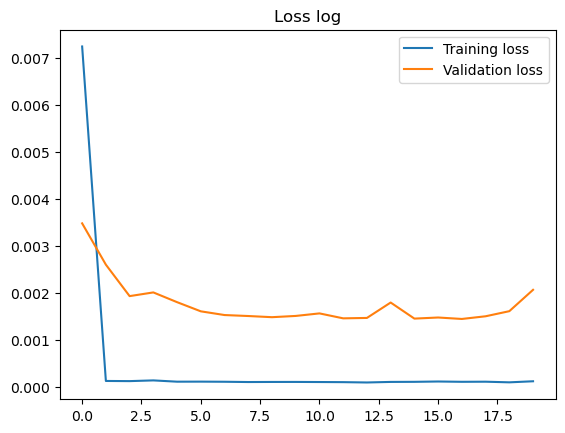

In [177]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.title("Loss log")
plt.show()

Predict Test Values

In [178]:
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Evaluation Matrix Results

In [185]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("r2: ", r2)

MSE:  0.0008066156349624486
r2:  0.9483818580179821


Visual comparison and Inspection of obtained Test Results

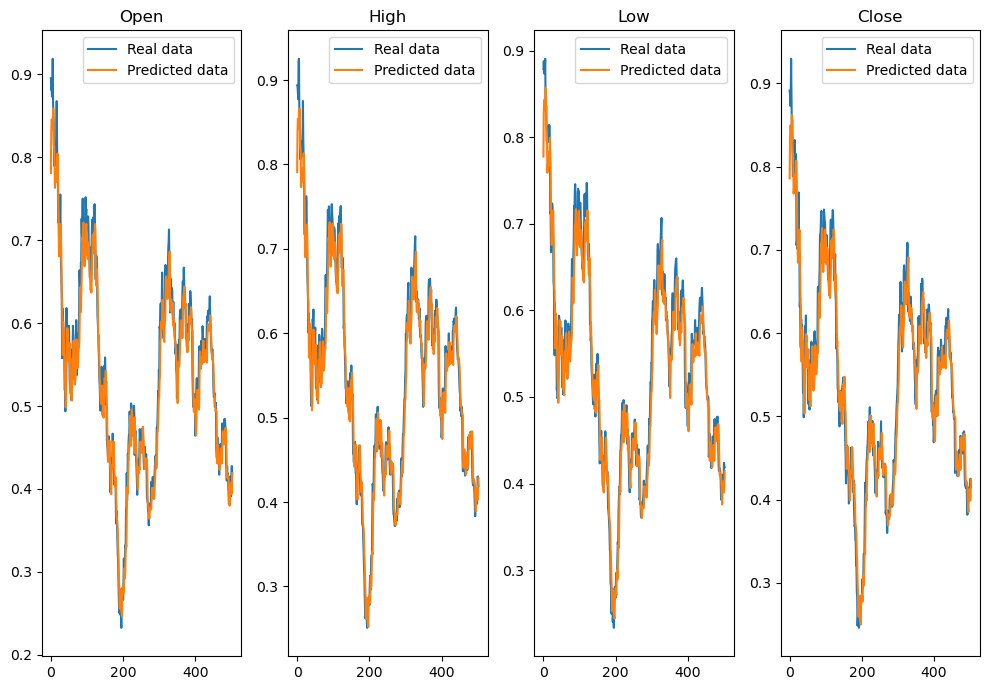

In [187]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
for i in range(4):
    axes[i].plot(y_test[:, i], label="Real data")
    axes[i].plot(y_pred[:, i], label="Predicted data")
    axes[i].legend()
    axes[i].set_title(nums[i])
plt.tight_layout()
plt.show()
